<a href="https://colab.research.google.com/github/Fathur2093/Analisis-Faktor-Risiko-Obesitas-dan-Prediksi-dengan-XGBClassifier-Studi-Kasus-Dataset-Obesitas/blob/main/22_11_5142_UAS_BDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Faktor Risiko Obesitas dan Prediksi dengan XGBClassifier: Studi Kasus Dataset Obesitas**

Nama : Fiqih Fathurrochim

NIM  : 22.11.5142

## **Import Library**

In [1]:
!pip install xgboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedGroupKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import set_config
import os
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedKFold
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.compose import make_column_transformer
from sklearn.base import clone
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

## **Load Datasets**

In [3]:
obesity = pd.read_csv('/content/train.csv')
obesity.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## **Exploratory Data Analysis**

### **info dataset**

In [4]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
missing_number = obesity.isnull().sum().sort_values(ascending=False)
missing_percent = (obesity.isnull().sum()/obesity.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing_values

,Missing_Number,Missing_Percent
id,0,0.0
Gender,0,0.0
MTRANS,0,0.0
CALC,0,0.0
TUE,0,0.0
FAF,0,0.0
SCC,0,0.0
CH2O,0,0.0
SMOKE,0,0.0
CAEC,0,0.0


In [6]:
obesity.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


### **frekuensi kategori**

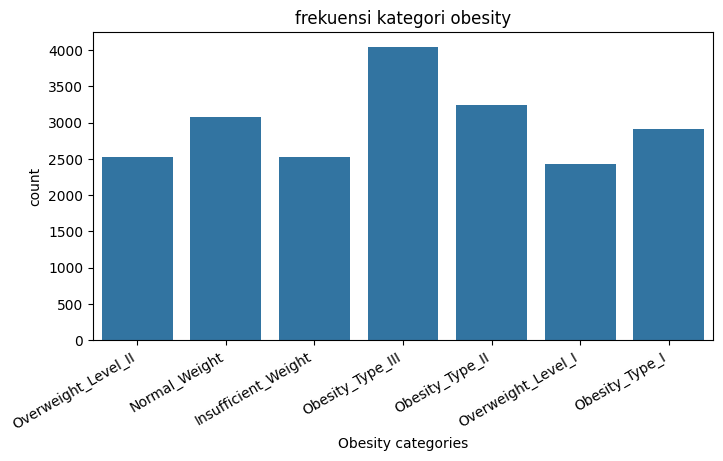

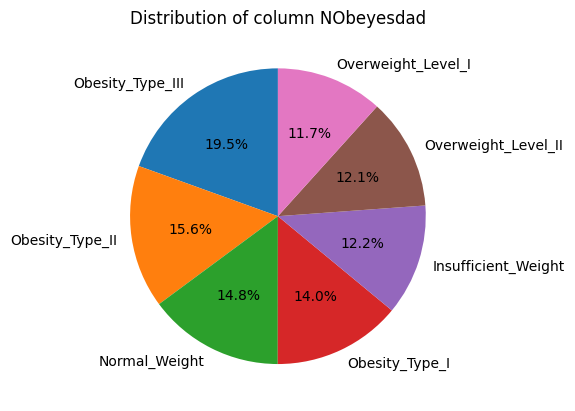

In [7]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x=obesity['NObeyesdad'])
plt.title("frekuensi kategori obesity")
plt.xlabel("Obesity categories")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

print(" ")

#Pie Chart of Distribution of NObeyesdad
x = ["Obesity_Type_III", "Obesity_Type_II",
"Normal_Weight",
"Obesity_Type_I",
"Insufficient_Weight",
"Overweight_Level_II",
"Overweight_Level_I"]
y = obesity["NObeyesdad"].value_counts()

plt.pie(y,autopct='%1.1f%%', startangle=90, labels=x)
plt.title("Distribution of column NObeyesdad")
plt.show()

### **histogram distribusi dataset**

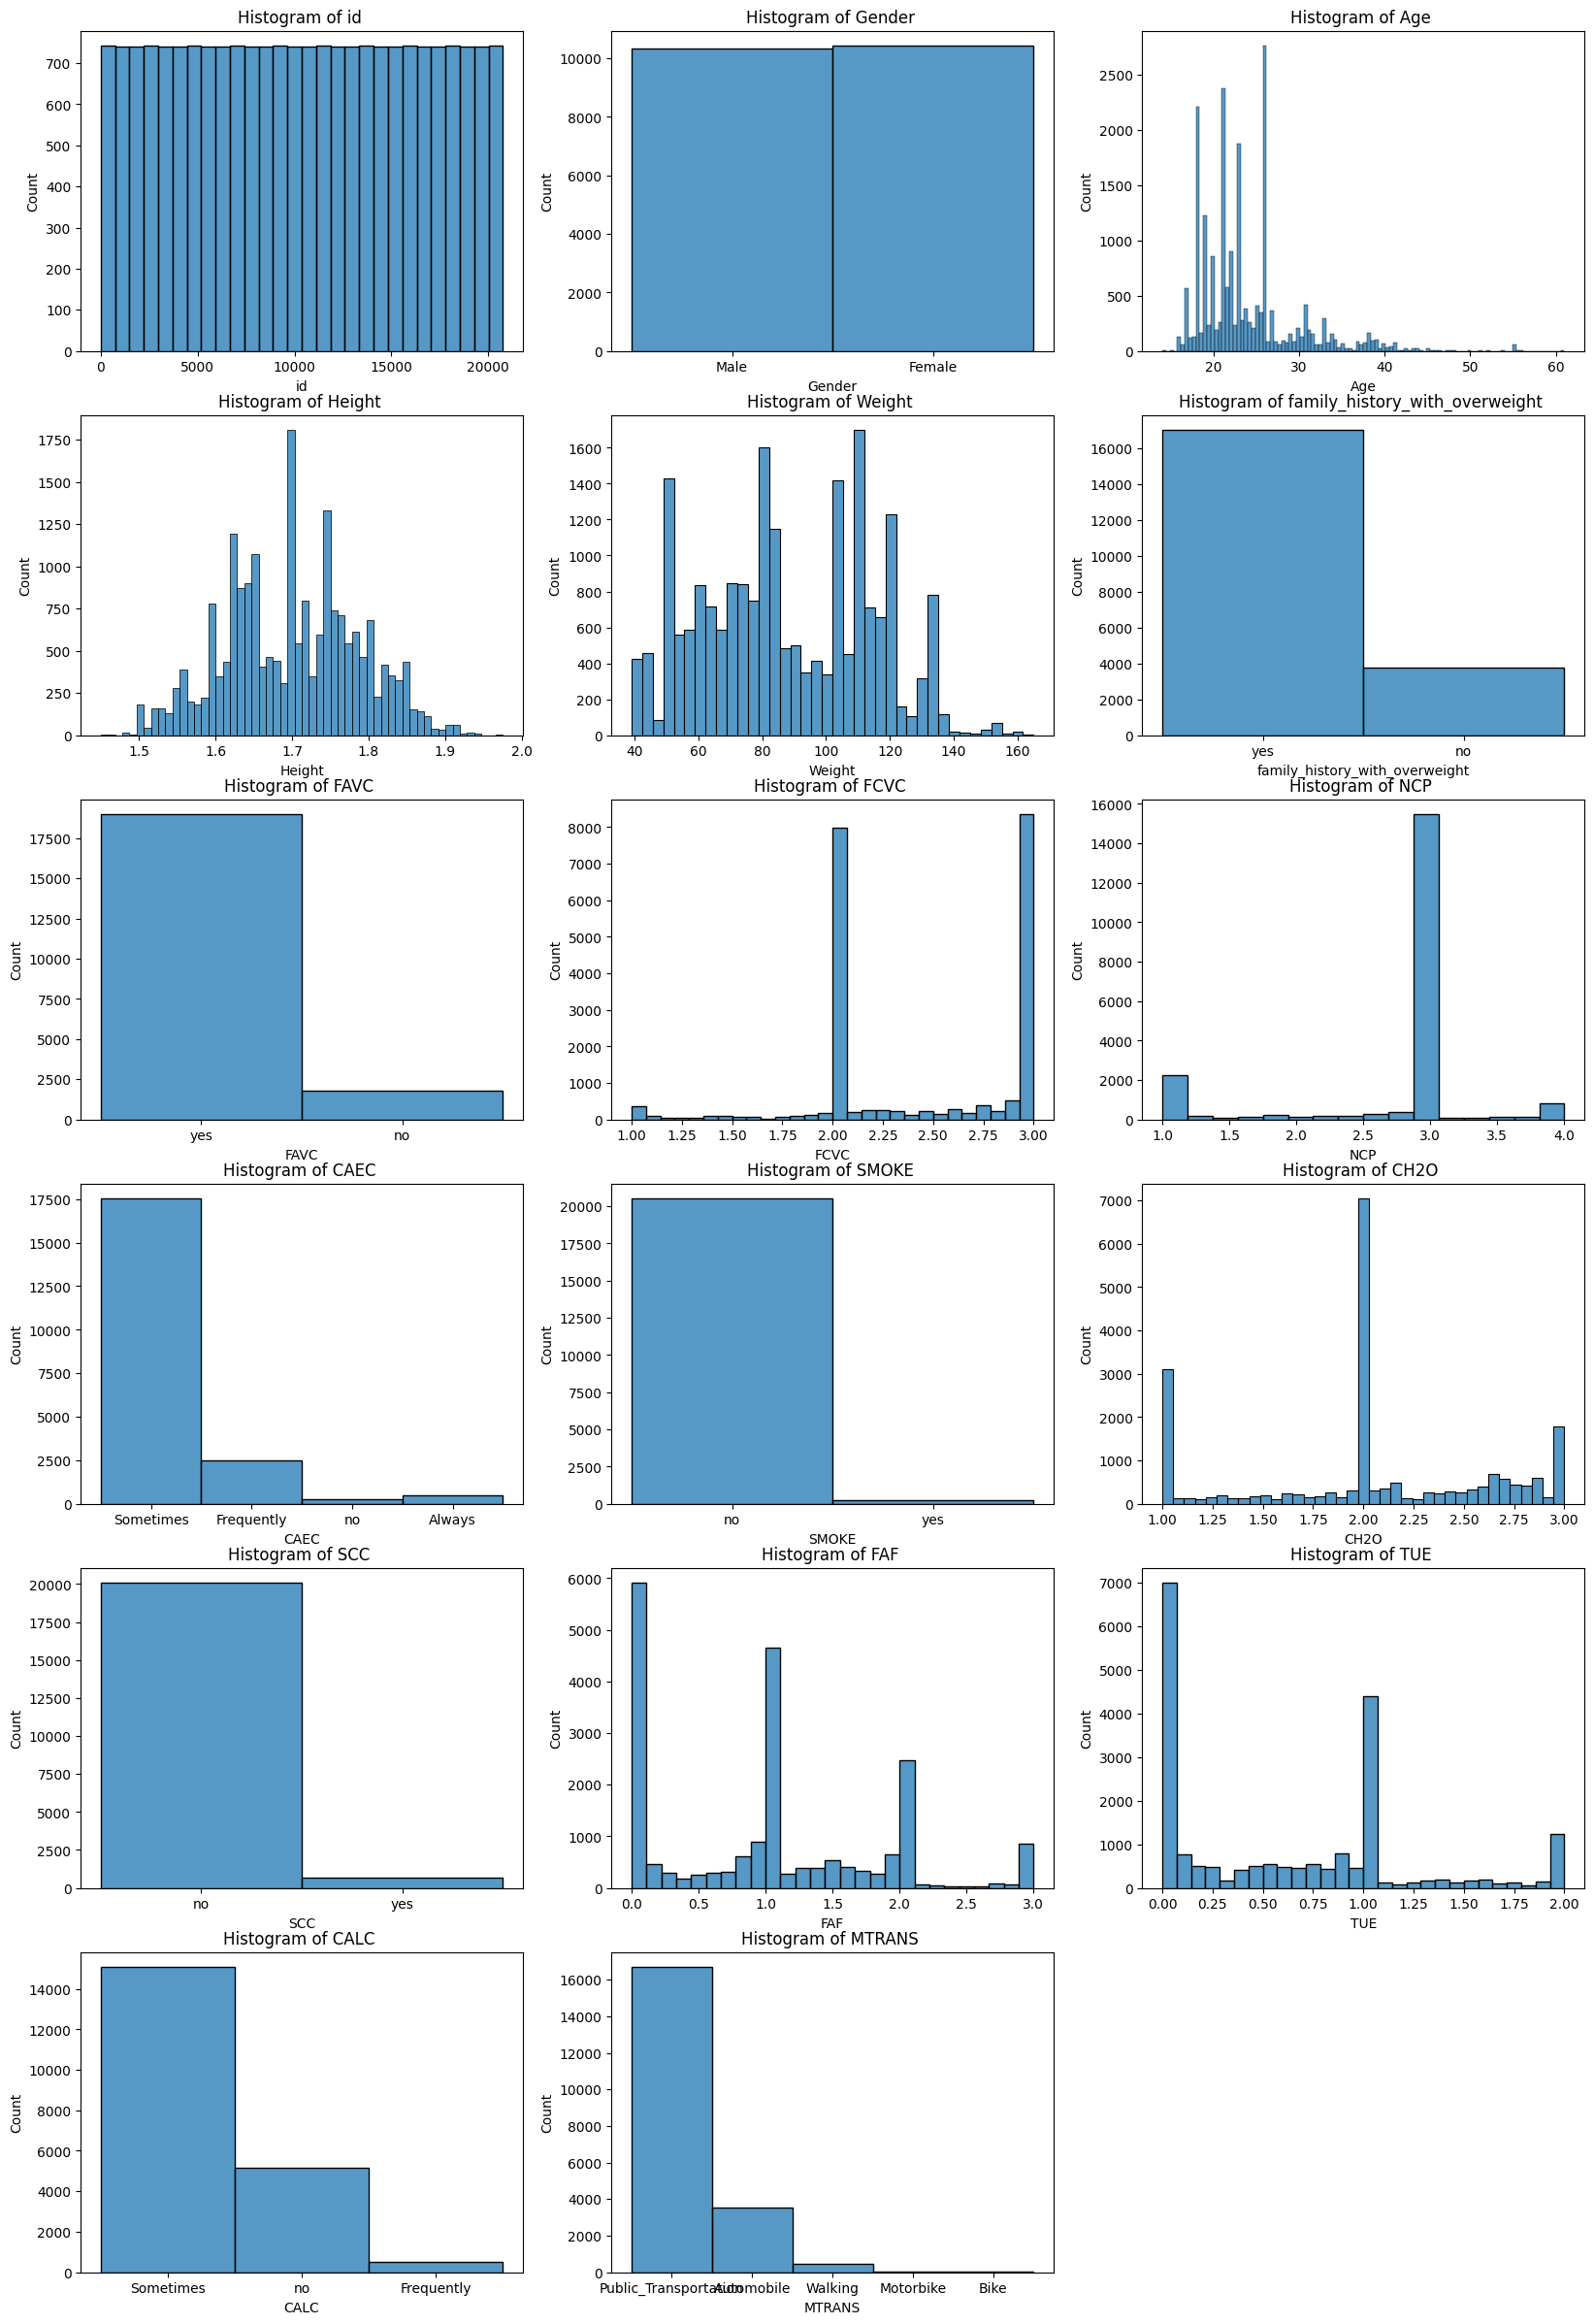

In [8]:
plt.figure(figsize = (20, 30))
for i, col in enumerate(obesity.columns[:-1], 1):
    plt.subplot(6, 3, i)
    sns.histplot(x = obesity[col])
    plt.title(f"Histogram of {col} ")
    plt.plot()

### **histogram persebaran kategori dengan dataset**

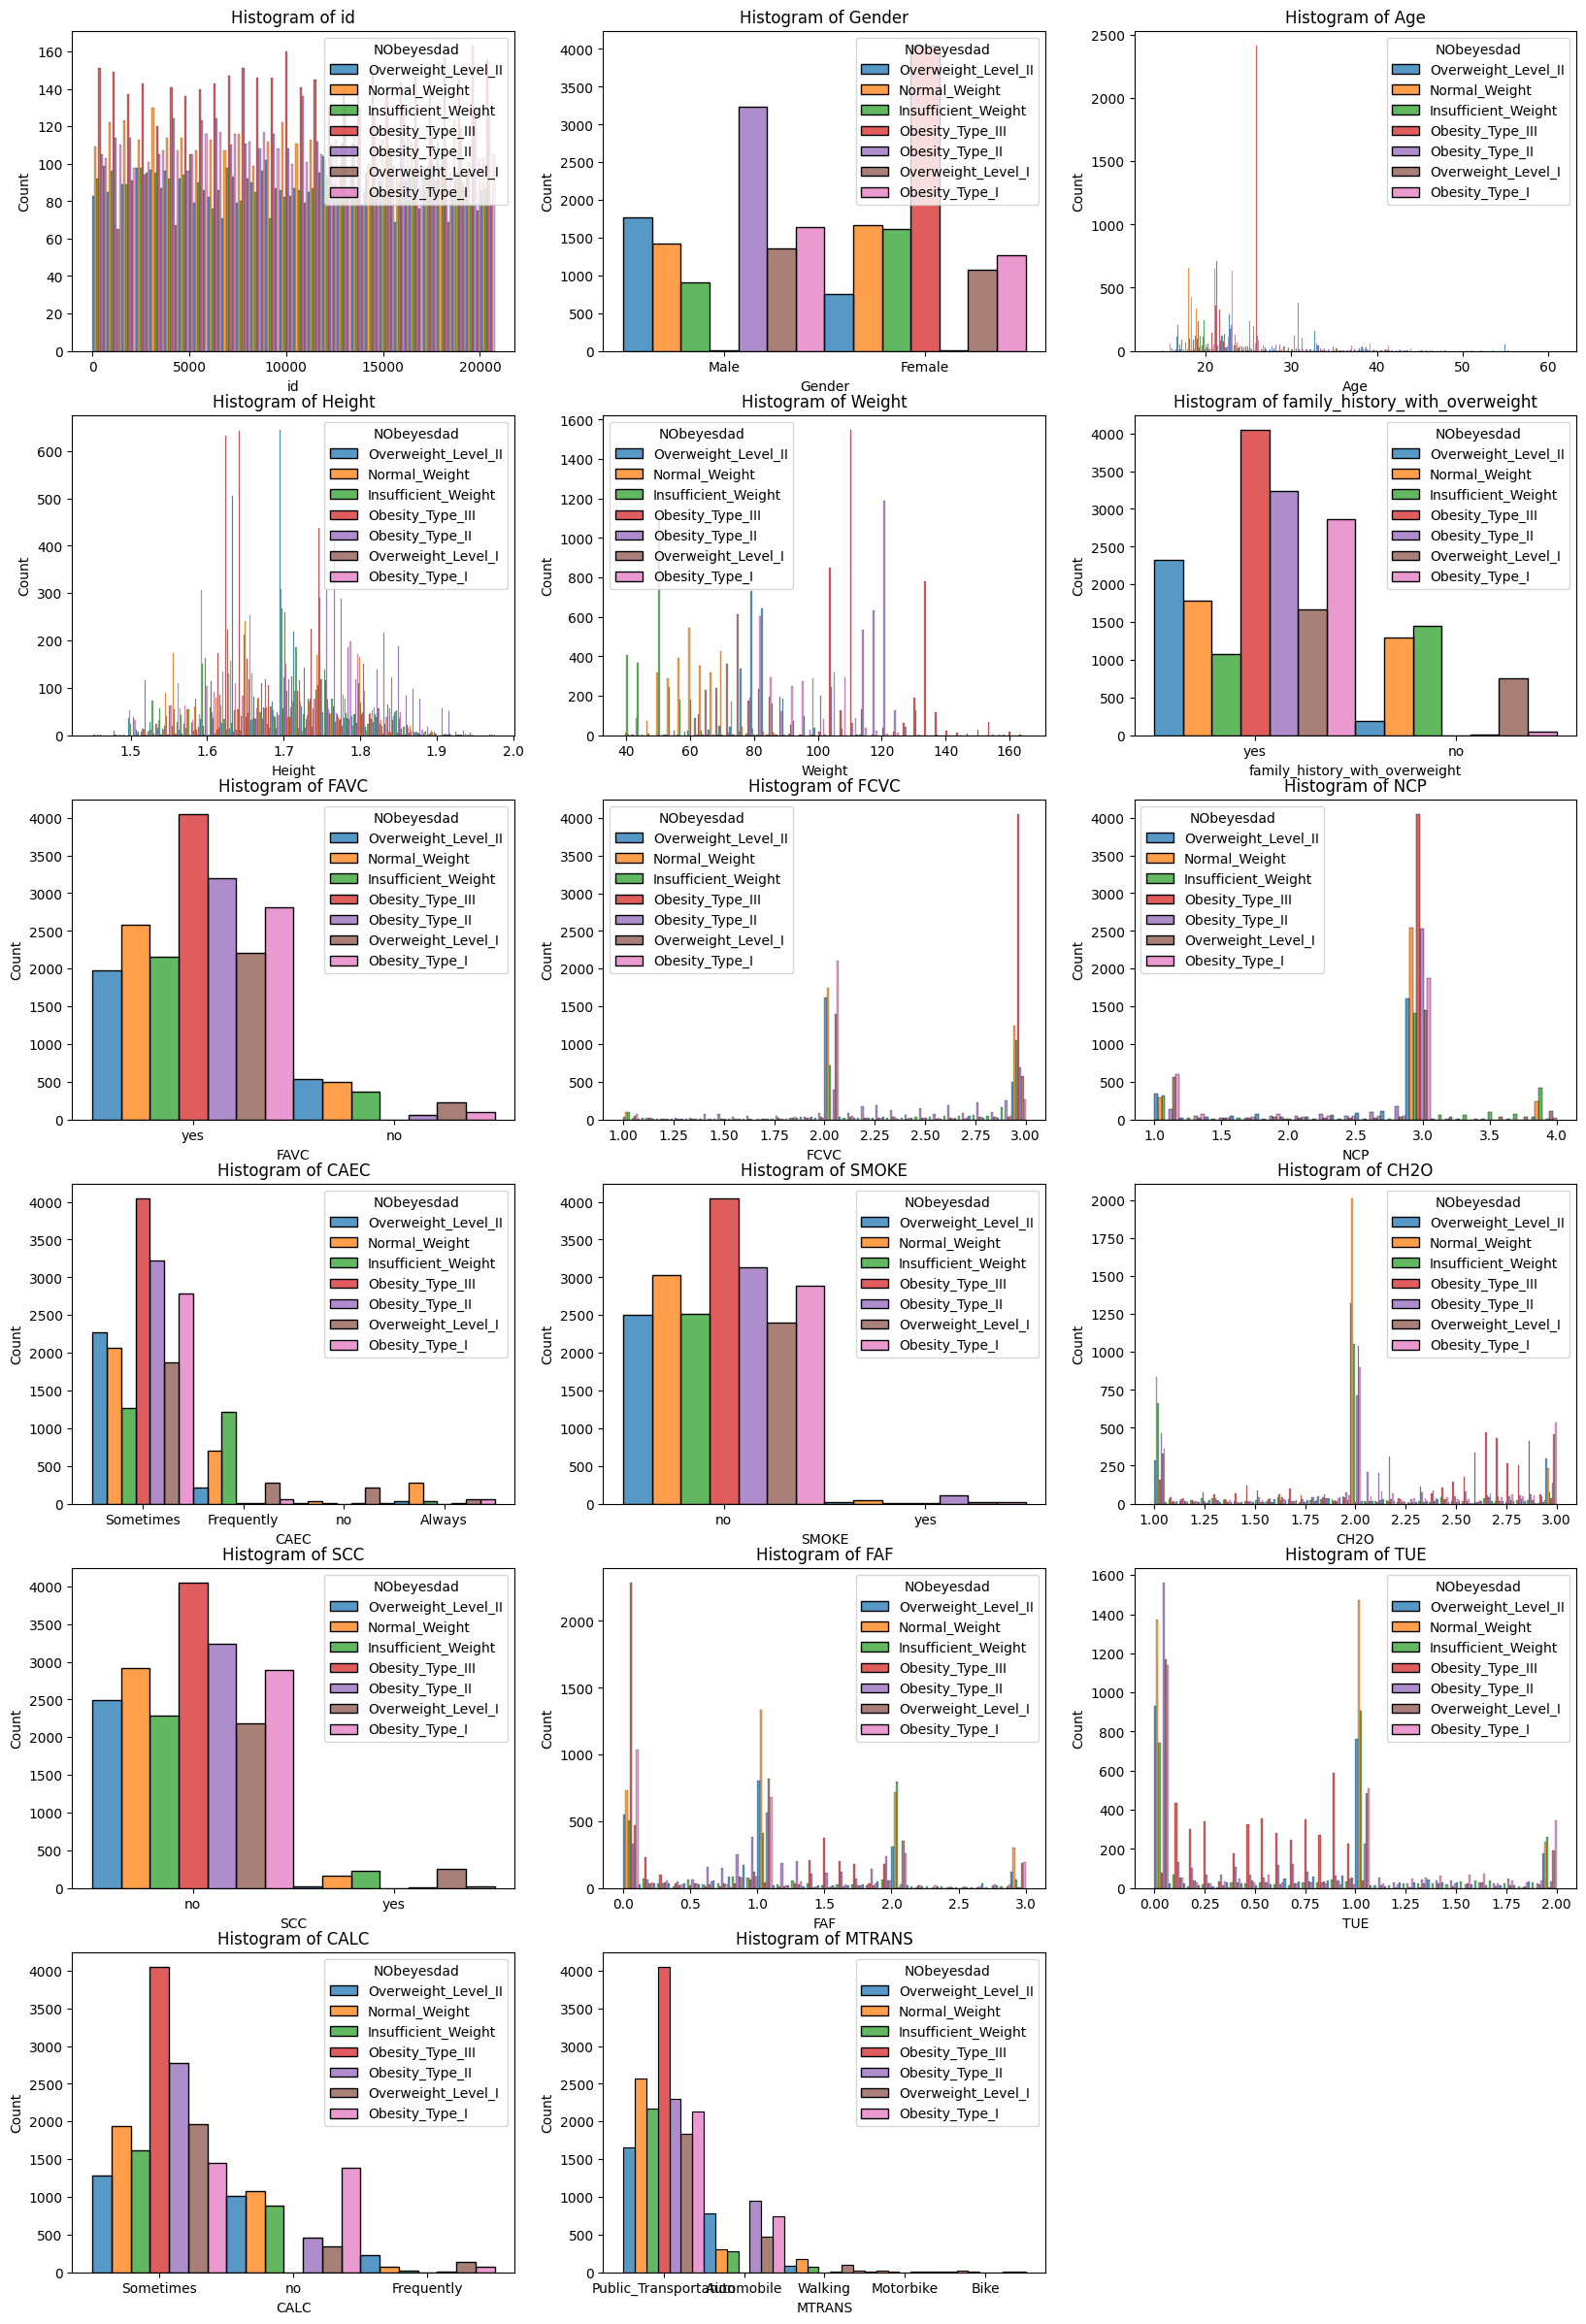

In [9]:
plt.figure(figsize = (20, 30))
for i, col in enumerate(obesity.columns[:-1], 1):
    plt.subplot(6, 3, i)
    sns.histplot(x = obesity[col], hue = obesity["NObeyesdad"], multiple = "dodge")
    plt.title(f"Histogram of {col}")
    plt.plot()

### **numerical correlation**

<Axes: >

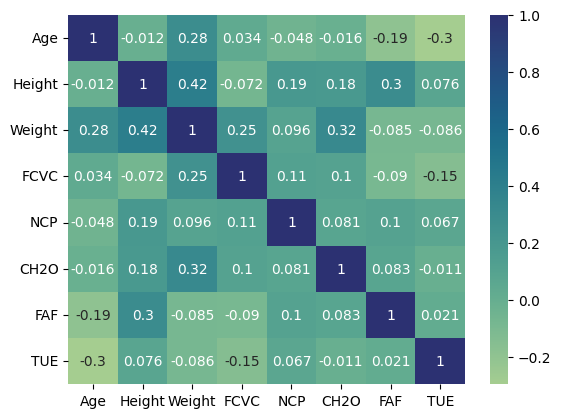

In [10]:
raw_num_cols = list(obesity.select_dtypes("float").columns)
raw_cat_cols = list(obesity.columns.drop(raw_num_cols+["NObeyesdad"]))

tmp = obesity[raw_num_cols].corr("pearson")
sns.heatmap(tmp,annot=True, cmap ="crest")

## **Preprocessing**

### **Encoder Labels**

In [11]:
le=LabelEncoder()
for col in obesity.select_dtypes(include=['object']).columns:
    obesity[col] = le.fit_transform(obesity[col])
obesity.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


### **hapus kolom yang tidak perlu**

In [12]:
if 'id' in obesity.columns:
    obesity = obesity.drop(columns=['id'])

obesity.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


### **melihat korelasi dari semua data**

In [13]:
obesity.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.066530,0.623507,0.118613,0.095786,0.021812,-0.312766,0.039468,0.046129,0.063349,0.053298,-0.061442,0.238399,0.058696,0.037345,-0.140049,0.046575
Age,0.066530,1.000000,-0.011713,0.283381,0.261575,0.056848,0.034414,-0.048479,0.151498,0.056006,-0.016325,-0.108855,-0.192259,-0.296154,-0.070323,-0.605345,0.283018
Height,0.623507,-0.011713,1.000000,0.416677,0.228137,0.115566,-0.071546,0.191383,0.069003,0.069748,0.183706,-0.095923,0.295278,0.076433,-0.089138,-0.049543,0.060786
Weight,0.118613,0.283381,0.416677,1.000000,0.514147,0.228770,0.245682,0.095947,0.337331,0.040416,0.317914,-0.185116,-0.084845,-0.086471,-0.216673,-0.008431,0.431821
family_history_with_overweight,0.095786,0.261575,0.228137,0.514147,1.000000,0.152154,0.047756,0.044778,0.204263,0.018782,0.191588,-0.166760,-0.094414,0.005762,0.002330,-0.109662,0.321325
FAVC,0.021812,0.056848,0.115566,0.228770,0.152154,1.000000,0.006952,0.011522,0.115675,-0.016009,0.039167,-0.111897,-0.067030,0.034843,-0.080184,-0.026666,0.010176
FCVC,-0.312766,0.034414,-0.071546,0.245682,0.047756,0.006952,1.000000,0.113349,-0.010870,-0.012191,0.101299,0.022120,-0.089822,-0.147843,-0.128793,0.093622,0.041076
NCP,0.039468,-0.048479,0.191383,0.095947,0.044778,0.011522,0.113349,1.000000,-0.089957,0.006820,0.080949,0.006633,0.100871,0.067459,-0.099421,-0.001813,-0.091154
CAEC,0.046129,0.151498,0.069003,0.337331,0.204263,0.115675,-0.010870,-0.089957,1.000000,-0.019703,0.132820,-0.099427,-0.092035,-0.049646,-0.066821,-0.051645,0.297420
SMOKE,0.063349,0.056006,0.069748,0.040416,0.018782,-0.016009,-0.012191,0.006820,-0.019703,1.000000,-0.023475,0.017185,0.008374,-0.016093,-0.023254,-0.022203,-0.001393


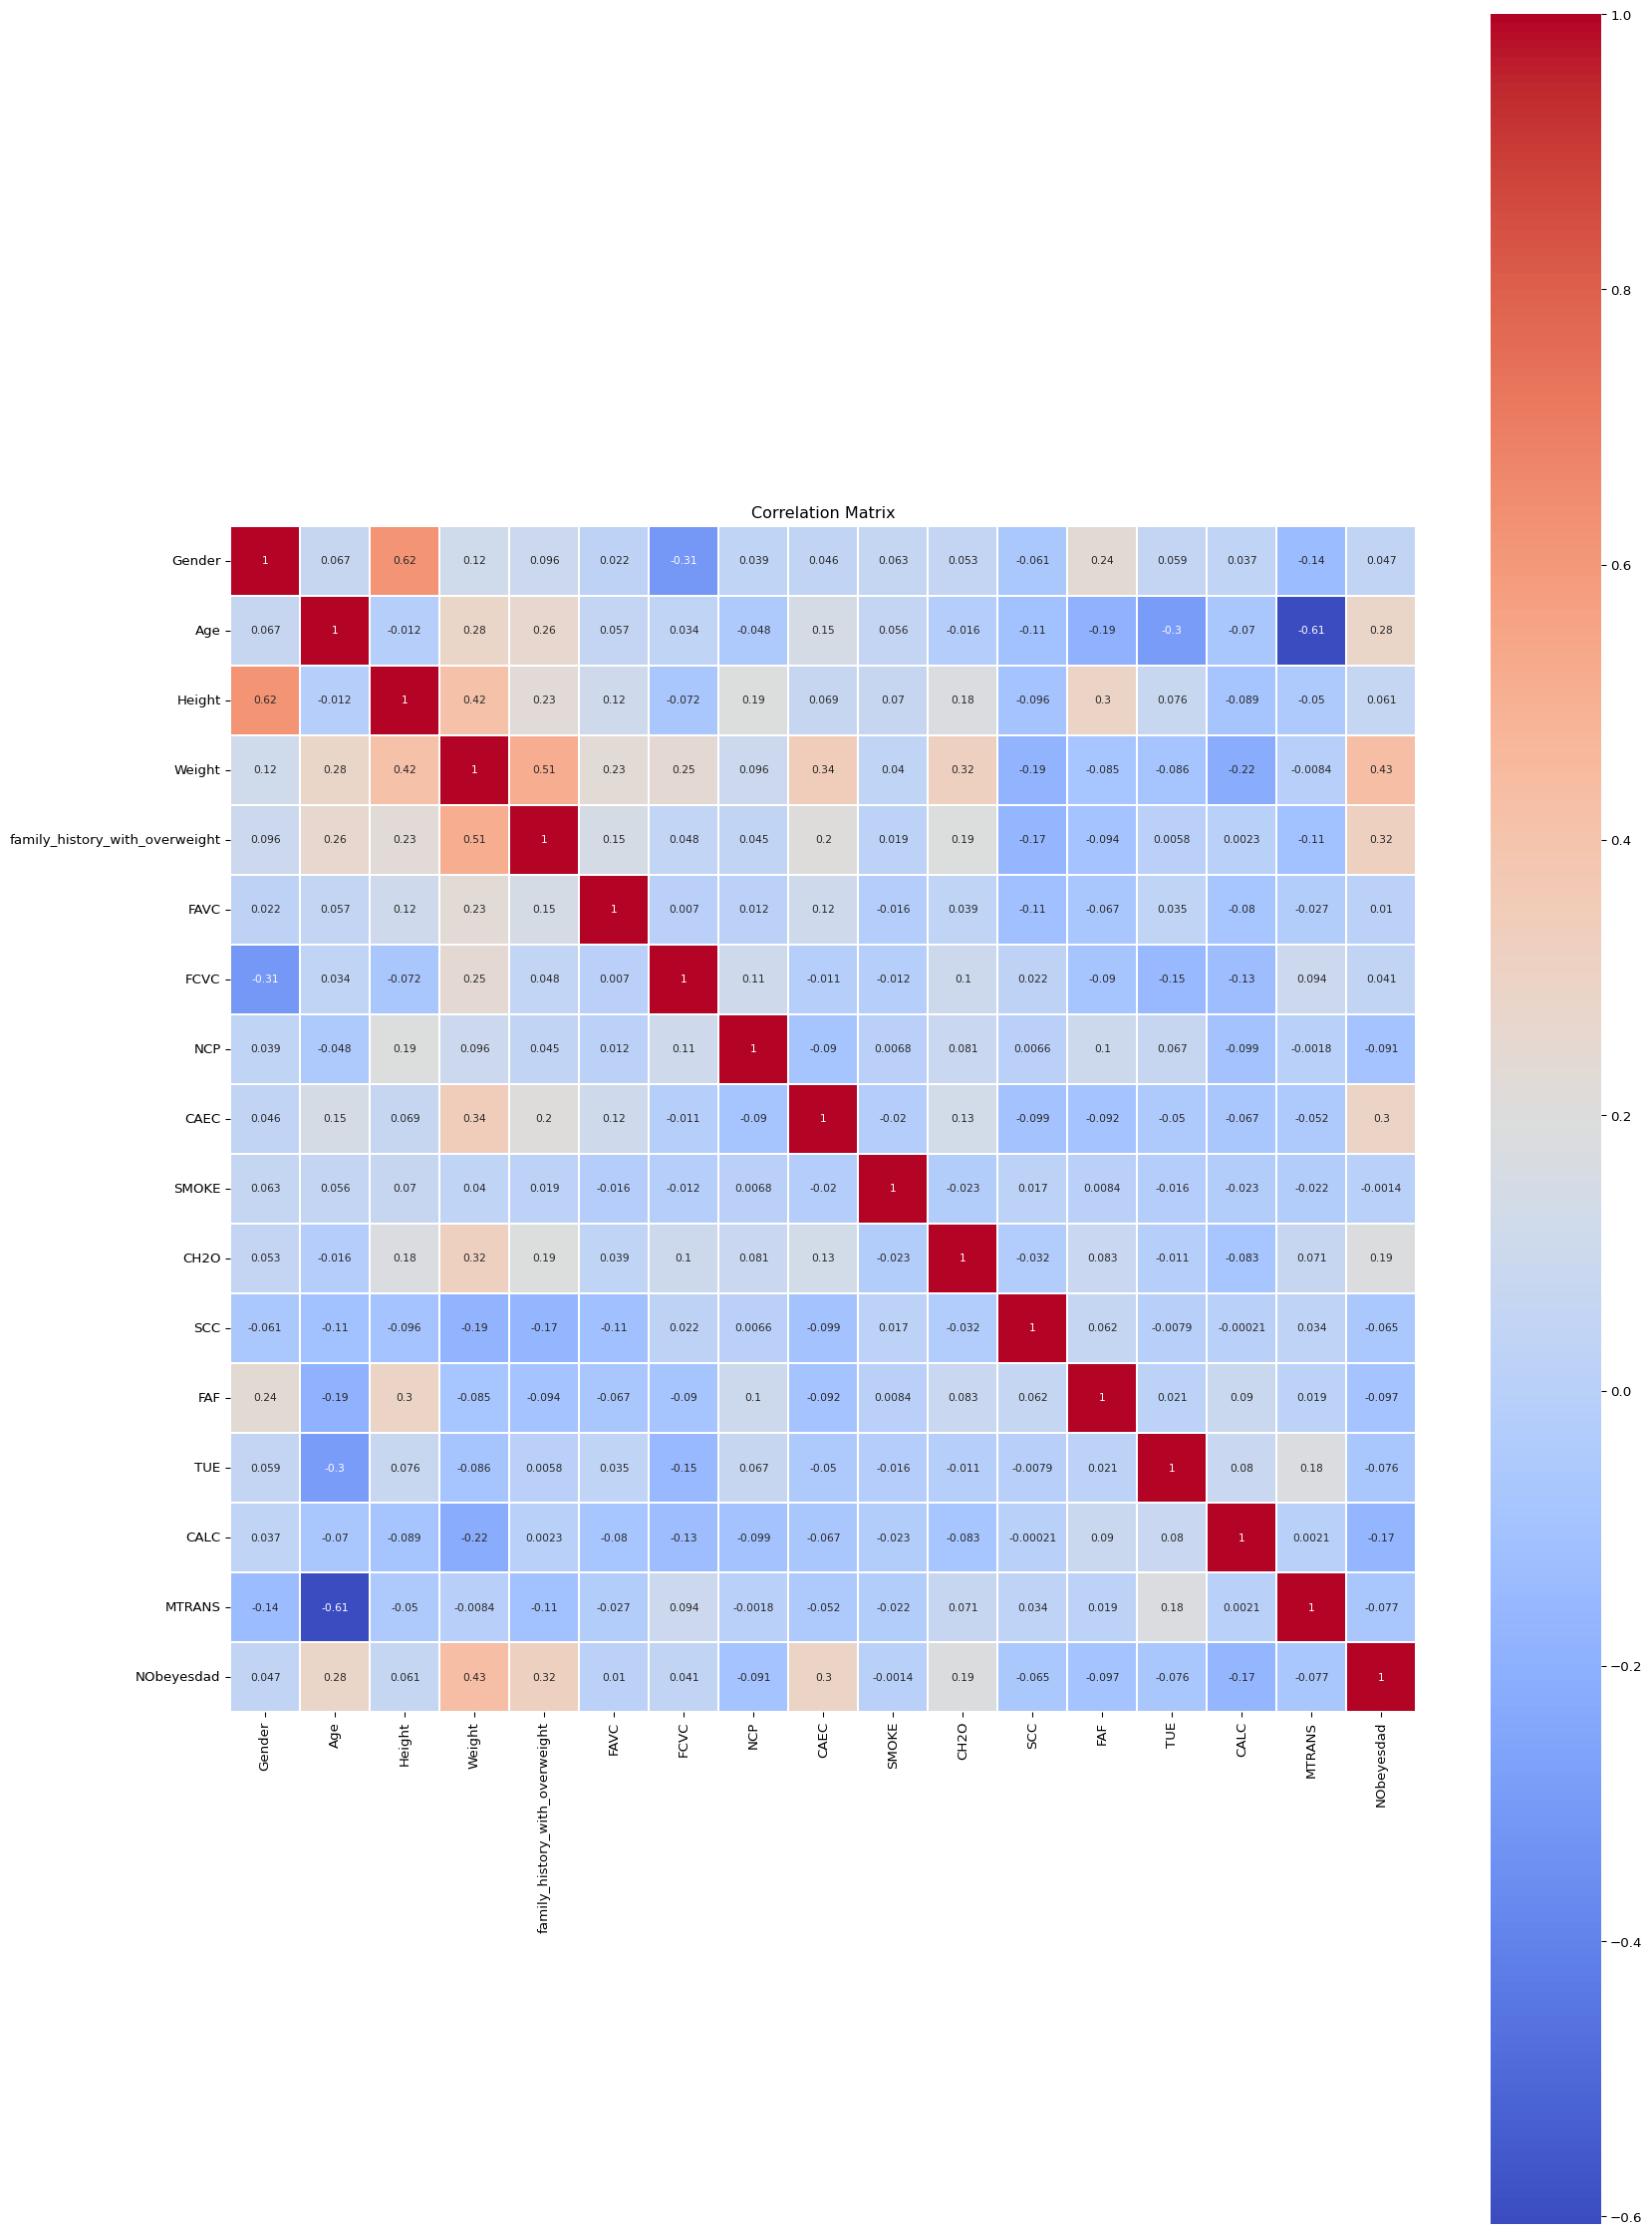

In [14]:
plt.figure(figsize=(20,30),dpi=96)
sns.heatmap(obesity.corr(), annot=True, cmap='coolwarm', linewidths=0.1, square=True, annot_kws={"fontsize":8})
plt.title('Correlation Matrix')
plt.show()

## **Select** Feature & Train Test Split

In [15]:
X=obesity.drop(columns='NObeyesdad')
y=obesity['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [16]:


# Seleksi Fitur
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Fitur terpilih:", selected_features)

# Buat dataset baru dengan fitur terpilih
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Fitur terpilih: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'CAEC', 'CH2O', 'CALC', 'MTRANS'],
      dtype='object')


In [17]:


print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 16606
Jumlah data testing: 4152


## **Modelling**

In [18]:
k_folds = 2
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


X_encoded = pd.get_dummies(X)


XGB = XGBClassifier(random_state=42)

accuracy_scores = []


for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    y_trainc, y_valc = le.fit_transform(y_train), le.fit_transform(y_val)


    XGB.fit(X_train, y_trainc)


    y_pred = XGB.predict(X_val)


    accuracy = accuracy_score(y_valc, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy :", accuracy)

    print(classification_report(y_valc, y_pred))


average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')

Accuracy : 0.9020136814722035
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1262
           1       0.86      0.89      0.88      1541
           2       0.89      0.89      0.89      1455
           3       0.97      0.97      0.97      1624
           4       1.00      1.00      1.00      2023
           5       0.80      0.75      0.77      1213
           6       0.80      0.81      0.80      1261

    accuracy                           0.90     10379
   macro avg       0.89      0.89      0.89     10379
weighted avg       0.90      0.90      0.90     10379

Accuracy : 0.899508623181424
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1261
           1       0.86      0.88      0.87      1541
           2       0.89      0.87      0.88      1455
           3       0.96      0.97      0.97      1624
           4       1.00      1.00      1.00      2023
           5       

## **Evaluasi model**

ROC AUC score: 0.9887985658305551


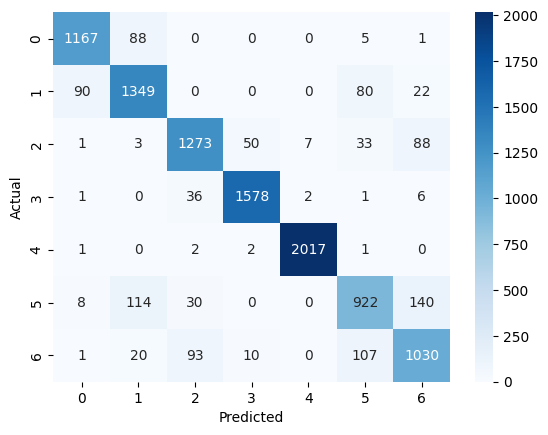

In [19]:

#Confusion Matrix

cm = confusion_matrix(y_valc, y_pred)

#Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#ROC AUC Score

y_prob = XGB.predict_proba(X_val)
roc_auc = roc_auc_score(y_valc, y_prob, multi_class='ovr')
print(f"ROC AUC score: {roc_auc}")

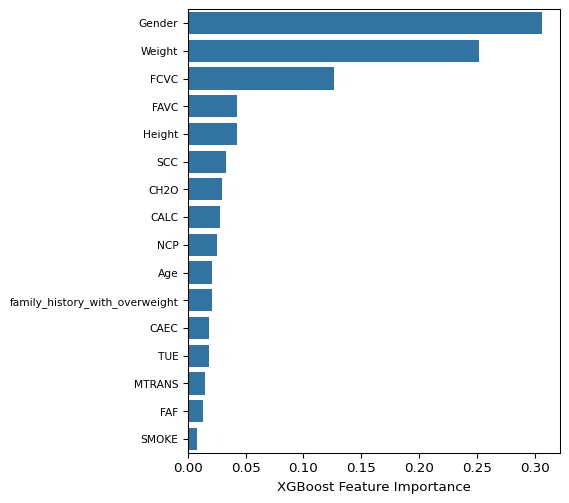

In [20]:
fi = pd.DataFrame({'features':np.array(X.columns), 'feature_importance':np.array(XGB.feature_importances_)})
fi.sort_values(by=['feature_importance'], ascending=False, inplace=True)
plt.figure(figsize=(5,6),dpi=96)
sns.barplot(fi, x='feature_importance', y='features')
plt.xlabel('XGBoost Feature Importance')
plt.ylabel('')
plt.tick_params(axis='y', labelsize=8)
plt.show()

## **Kesimpulan**

 **Kesimpulan Berdasarkan Data dan Hasil Analisis:**

- Dataset Obesitas: Dataset berisi informasi tentang berbagai faktor risiko obesitas, termasuk variabel demografi, kebiasaan makan, dan aktivitas fisik. Dataset ini memiliki 7 kelas obesitas, mulai dari Insufficient_Weight hingga Obesity_Type_III.
- Faktor Risiko: Analisis data eksploratif menunjukkan bahwa beberapa faktor seperti family_history_with_overweight, FAVC, FCVC, NCP, CAEC, CH2O, dan SCC memiliki korelasi yang relatif tinggi dengan kelas obesitas. Variabel-variabel ini berpotensi menjadi faktor risiko utama obesitas.
- Prediksi Obesitas: Model XGBoost yang dilatih mampu memprediksi kelas obesitas dengan akurasi yang cukup tinggi. Rata-rata akurasi yang didapatkan dari Stratified K-Fold Cross Validation adalah sekitar 90%. Hal ini menunjukkan bahwa model dapat menggeneralisasi dengan baik pada data yang tidak terlihat sebelumnya.
- Fitur Penting: Analisis feature importance dari model XGBoost menunjukkan bahwa family_history_with_overweight, FAVC, FCVC, NCP, dan CAEC merupakan fitur-fitur yang paling berpengaruh dalam prediksi obesitas. Fitur-fitur ini perlu diperhatikan dalam upaya pencegahan dan penanganan obesitas.
- Evaluasi Model: Confusion matrix menunjukkan bahwa model memiliki performa yang baik dalam mengklasifikasikan sebagian besar kelas obesitas. ROC AUC score yang tinggi juga menunjukkan bahwa model memiliki kemampuan diskriminasi yang baik antara kelas-kelas obesitas.